## Import

In [155]:
# pip install tensorflow matplotlib tensorflow-datasets ipywidgets

In [226]:
import tensorflow as tf
#import dataset
import tensorflow_datasets as tfds
#matplot lib for visualization
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [227]:
#bring dataset to variable
ds = tfds.load("fashion_mnist",split = "train")

## Visualize Dataset

In [228]:
import numpy as np

In [229]:
dataiterator = ds.as_numpy_iterator()

In [233]:
dataiterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  2],
         [127],
         [106],
         [136],
         [102],
         [147],
         [136],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 64],
         [254],
         [255],
         [254],
         [255],
         [255],
         [255],
         [247],
         [161],
         [122],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

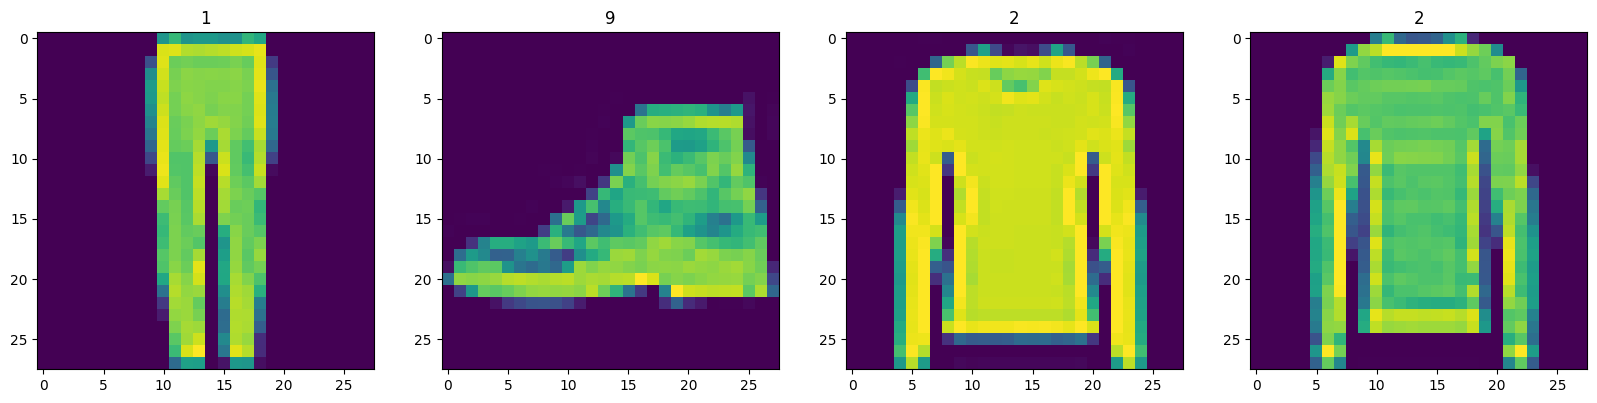

In [234]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for i in range(4):
    batch = dataiterator.next()
    ax[i].imshow(np.squeeze(batch['image']))
    ax[i].title.set_text(batch['label'])

In [235]:
def scale_images(data):
    image = data['image']
    return image/255

In [225]:
ds = tfds.load("fashion_mnist",split="train")
ds = ds.map(scale_images)
ds = ds.cache()
ds = ds.shuffle(60000)
ds = ds.batch(128)
ds = ds.prefetch(64)

In [197]:
ds.as_numpy_iterator().next().shape

(128, 28, 28, 1)

## Build

In [237]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D 

### Build Generator

In [238]:
def build_generator():
    model = Sequential()

    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,4,padding='same', activation='sigmoid'))
    
    return model

In [239]:
generator = build_generator()

In [240]:
generator.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_50 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_6 (Reshape)         (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_12 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_51 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

In [202]:
img = generator.predict(np.random.randn(4,128,1))
img.shape

1/1 [==============================] - 0s 85ms/step


(4, 28, 28, 1)

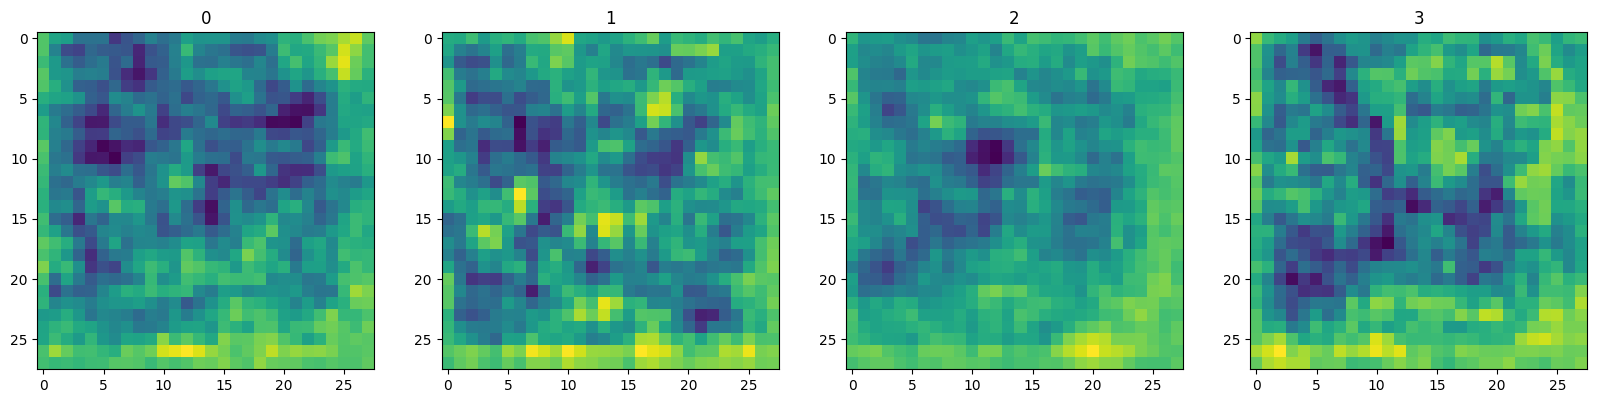

In [203]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))
for i,v in enumerate(img):
    ax[i].imshow(np.squeeze(v))
    ax[i].title.set_text(i)

### Build Discriminator

In [241]:
def build_discriminator():
    model = Sequential()

    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))

    

    return model

In [242]:
discriminator = build_discriminator()

In [243]:
discriminator.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_55 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_25 (Dropout)        (None, 24, 24, 32)        0         
                                                                 
 conv2d_56 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_56 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_26 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_57 (Conv2D)          (None, 16, 16, 128)     

In [205]:
discriminator.predict(img)

1/1 [==============================] - 0s 26ms/step


array([[0.5024402 ],
       [0.5024864 ],
       [0.502624  ],
       [0.50268906]], dtype=float32)

## Training

In [206]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


In [207]:
g_opt = Adam(learning_rate=0.0001)
d_opt = Adam(learning_rate=0.00001)
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [208]:
from tensorflow.keras.models import Model

In [209]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        super().__init__(*args,**kwargs)
        self.generator = generator
        self.discriminator = discriminator
        

    def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
        super().compile(*args,**kwargs)

        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss
        

    def train_step(self,batch):
        real_images = batch
        fake_images = self.generator(tf.random.normal((128,128,1)),training = False)

        with tf.GradientTape() as d_tape:
            yhat_real = self.discriminator(real_images, training=True)
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake],axis=0)

            y_realfake = tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)

            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real,noise_fake],axis=0)

            total_d_loss = self.d_loss(y_realfake,yhat_realfake)

        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables)
        self.d_opt.apply_gradients(zip(dgrad,self.discriminator.trainable_variables))
        
        with tf.GradientTape() as g_tape:
            gen_images = self.generator(tf.random.normal((128,128,1)),training=True)
            
            predicted_labels = self.discriminator(gen_images,training=False)

            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels),predicted_labels)
    
        ggrad = g_tape.gradient(total_g_loss,self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))

        return {"d_loss":total_d_loss,"g_loss":total_g_loss}
        

In [244]:
fashgan = FashionGAN(generator,discriminator)

In [245]:
fashgan.compile(g_opt,d_opt,g_loss,d_loss)